nerual network 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import scipy.optimize as opt 
from sklearn.metrics import classification_report 

In [4]:
def load_data(path ,transpose=True):
    data= sio.loadmat(path)
    y=data.get('y')
    y=y.reshape(y.shape[0])
    
    X=data.get('X')
    
    if transpose :
        X = np.array([im.reshape((20,20)).T for im in X])
        
        X = np.array([im.reshape(400) for im  in X])
        
    return X, y

In [5]:
X, y= load_data('ex3data1.mat')

print(X.shape)
print(y.shape)

(5000, 400)
(5000,)


In [6]:
def plot_an_image(image):
    fig ,ax = plt.subplots(figsize=(1,1))
    ax.matshow(image.reshape((20,20)),cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    
    

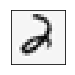

this shoud be 2


In [7]:
pick_one = np.random.randint(0,5000)
plot_an_image(X[pick_one,:])
plt.show()
print ('this shoud be {}'.format(y[pick_one]))

In [8]:
def plot_100_image(X):
    '''
    X:(5000,400)
    '''
    size = int(np.sqrt(X.shape[1]))
    
    sample_idx = np.random.choice(np.arange(X.shape[0]), 100)
    sample_images = X[sample_idx,:]
    
    fig,ax_array = plt.subplots(nrows=10,ncols=10,sharey=True,sharex=True,figsize=(8,8))
    
    for r in range(10):
        for c in range(10):
            ax_array[r,c].matshow(sample_images[10 *r +c].reshape((size,size)),
                                 cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            
    

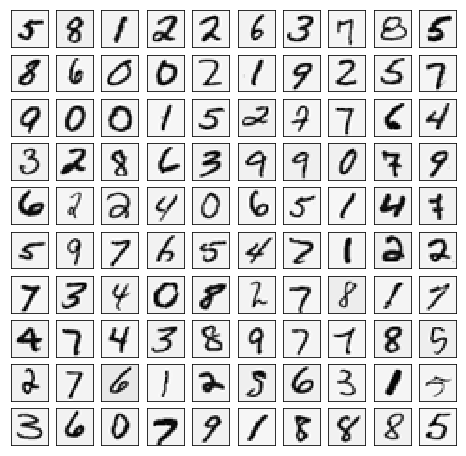

In [9]:
plot_100_image(X)
plt.show()

### prepare data

In [10]:
raw_X,raw_y = load_data('ex3data1.mat')


In [11]:
X = np.insert(raw_X,0,values=np.ones(raw_X.shape[0]),axis=1)
X.shape
print (raw_y)

[10 10 10 ...  9  9  9]


In [22]:
raw_y.shape

(5000,)

In [23]:
y_matrix = []

for k in range(1,11):
    y_matrix.append((raw_y ==k).astype(int))
    
y_matrix = [y_matrix[-1]]+y_matrix[:-1]
y = np.array(y_matrix)

y.shape


[array([0, 0, 0, ..., 0, 0, 0])] 1
[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])] 2
[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])] 3
[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])] 4
[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])] 5
[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])] 6
[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])] 7
[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..

(10, 5000)

In [24]:
y

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

### train 1 model 

In [13]:
def cost(theta,X,y):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)) )

In [14]:
def regularized_cost(theta,X,y,l=1):
    theta_j1_to_n = theta[1:]
    regularized_term = (l / (2*len(X))) * np.power(theta_j1_to_n,2).sum()
    
    return cost(theta,X,y ) + regularized_term

In [15]:
def regularized_gradient(theta,X,y,l=1):
    theta_j1_to_n = theta[1:]
    regularized_theta = (l/len(X)) * theta_j1_to_n
    
    regularzied_term = np.concatenate([np.array([0]),regularized_theta])
    
    return gradient(theta,X,y) + regularzied_term

In [16]:
def sigmoid(z):
    return 1 /(1 +np.exp(-z))

In [17]:
def gradient(theta ,X,y):
    return (1/len(X)) * X.T @(sigmoid(X @ theta) - y)


In [18]:
def logistic_regression(X,y,l=1):
    theta = np.zeros(X.shape[1])
    res = opt.minimize(fun = regularized_cost,
                      x0=theta,
                      args=(X,y,l),
                      method='TNC',
                      jac = regularized_gradient,
                      options ={'disp':True})
    final_theta = res.x
    
    return final_theta

In [19]:
def predict(x,theta):
    prob = sigmoid(x@theta)
    return (prob >= 0.5).astype(int)

In [20]:
t0 = logistic_regression(X,y[0])

F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [74]:
print (t0.shape,y.shape)

y_pred = predict(X,t0)
print(y_pred.shape)
print ('Accuracy={}'.format(np.mean(y[0] == y_pred)))

(401,) (10, 5000)
(5000,)
Accuracy=0.9974


tarin k model 

In [92]:
k_theta = np.array([logistic_regression(X,y[k]) for k in range(10)])
print (k_theta.shape)

(10, 401)


In [96]:
prob_matrix = sigmoid(X@k_theta.T)

In [97]:
np.set_printoptions(suppress = True)
prob_matrix

array([[0.99577454, 0.        , 0.00053449, ..., 0.00006471, 0.00003909,
        0.0017211 ],
       [0.99834553, 0.0000001 , 0.00005604, ..., 0.00009684, 0.0000029 ,
        0.00008491],
       [0.99139849, 0.        , 0.00056736, ..., 0.00000654, 0.02653092,
        0.00197823],
       ...,
       [0.00000068, 0.04138093, 0.00320719, ..., 0.00012727, 0.00297312,
        0.70745299],
       [0.00001842, 0.00000013, 0.00000009, ..., 0.00164823, 0.06818557,
        0.86090458],
       [0.02876921, 0.        , 0.00012966, ..., 0.36620041, 0.00497517,
        0.14828565]])

In [98]:
y_pred = np.argmax(prob_matrix,axis=1)

In [99]:
y_pred

array([0, 0, 0, ..., 9, 9, 7], dtype=int64)

In [100]:
y_answer = raw_y.copy()
y_answer[y_answer ==10] =0

In [101]:
print (classification_report(y_answer,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       500
           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500

   micro avg       0.94      0.94      0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



In [102]:
def load_weight(path):
    data = sio.loadmat(path)
    return data['Theta1'],data['Theta2']

In [103]:
theta1 ,theta2 = load_weight('ex3weights.mat')

theta1.shape ,theta2.shape

((25, 401), (10, 26))

In [104]:
X ,y =load_data('ex3data1.mat',transpose=False)

In [105]:
X = np.insert(X,0,values=np.ones(X.shape[0]),axis=1)

X.shape  ,y.shape

((5000, 401), (5000,))

In [106]:
a1 = X


In [107]:
z2 = a1 @ theta1.T # (5000,401)@ (401,25) =(5000,25)

In [108]:
z2.shape

(5000, 25)

In [110]:
z2 = np.insert(z2,0,values=np.ones(z2.shape[0]),axis=1)

In [111]:
z2.shape

(5000, 26)

In [112]:
a2 = sigmoid(z2)
a2.shape

(5000, 26)

In [113]:
z3 = a2 @ theta2.T
z3.shape
a3 = sigmoid(z3)
a3

array([[0.00013825, 0.0020554 , 0.00304012, ..., 0.00049102, 0.00774326,
        0.99622946],
       [0.00058776, 0.00285027, 0.00414688, ..., 0.00292311, 0.00235617,
        0.99619667],
       [0.00010868, 0.0038266 , 0.03058551, ..., 0.07514539, 0.0065704 ,
        0.93586278],
       ...,
       [0.06278247, 0.00450406, 0.03545109, ..., 0.0026367 , 0.68944816,
        0.00002744],
       [0.00101909, 0.00073436, 0.00037856, ..., 0.01456166, 0.97598976,
        0.00023337],
       [0.00005908, 0.00054172, 0.0000259 , ..., 0.00700508, 0.73281465,
        0.09166961]])

In [114]:
y_pred = np.argmax(a3,axis=1) +1
y_pred.shape

(5000,)

In [115]:
print (classification_report(y,y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       500
           2       0.98      0.97      0.97       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.98      0.98      0.98       500
           6       0.97      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

   micro avg       0.98      0.98      0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

